<a href="https://colab.research.google.com/github/PosgradoMNA/actividades-del-projecto-equipo-97/blob/main/semana4/actividad-semana4-2.ipynb" target="_parent"><img src="https://colab.research.google.com/assets/colab-badge.svg" alt="Open In Colab"/></a>

# *   Nombre de la entrega: Actividad Semanal -- 4
# *   Nombre: Oscar Villa Cardenas
# *   Matricula: A01794052
# *   Materia: Ciencia y Analitica
# *   Profesor: Jobish Vallikavungal Devassia
# *   Fecha: 2022-10-05

# Descripcion(Resumen del entendimiento sobre conceptos de componentes principales)
*   Principal component analysis (PCA) es una tecnica para la reduccion de la dimensionalidad de los datasets, Incrementando su interoperabilidad pero al mismo tiempo minimizando la perdida de informacion. Esto lo logra al crear nuevas variables no correlacionadas que maximicen su varianza exitosamente

In [52]:
import pandas as pd
import numpy as np
from sklearn.preprocessing import StandardScaler
from sklearn.decomposition import PCA
from sklearn import preprocessing
import matplotlib as mpl
import matplotlib.pyplot as plt
import seaborn as sns

Cargamos el dataframe

In [53]:
customers_default_payments = 'https://raw.githubusercontent.com/PosgradoMNA/Actividades_Aprendizaje-/main/default%20of%20credit%20card%20clients.csv'
customers_default_payments_df = pd.read_csv(customers_default_payments)
df = customers_default_payments_df.copy()
df.dropna(axis=0, inplace=True)
df.head(10)

,ID,X1,X2,X3,X4,X5,X6,X7,X8,X9,...,X15,X16,X17,X18,X19,X20,X21,X22,X23,Y
0,1,20000,2.0,2.0,1.0,24.0,2.0,2.0,-1.0,-1.0,...,0.0,0.0,0.0,0.0,689.0,0.0,0.0,0.0,0.0,1.0
1,2,120000,2.0,2.0,2.0,26.0,-1.0,2.0,0.0,0.0,...,3272.0,3455.0,3261.0,0.0,1000.0,1000.0,1000.0,0.0,2000.0,1.0
2,3,90000,2.0,2.0,2.0,34.0,0.0,0.0,0.0,0.0,...,14331.0,14948.0,15549.0,1518.0,1500.0,1000.0,1000.0,1000.0,5000.0,0.0
3,4,50000,2.0,2.0,1.0,37.0,0.0,0.0,0.0,0.0,...,28314.0,28959.0,29547.0,2000.0,2019.0,1200.0,1100.0,1069.0,1000.0,0.0
4,5,50000,1.0,2.0,1.0,57.0,-1.0,0.0,-1.0,0.0,...,20940.0,19146.0,19131.0,2000.0,36681.0,10000.0,9000.0,689.0,679.0,0.0
5,6,50000,1.0,1.0,2.0,37.0,0.0,0.0,0.0,0.0,...,19394.0,19619.0,20024.0,2500.0,1815.0,657.0,1000.0,1000.0,800.0,0.0
6,7,500000,1.0,1.0,2.0,29.0,0.0,0.0,0.0,0.0,...,542653.0,483003.0,473944.0,55000.0,40000.0,38000.0,20239.0,13750.0,13770.0,0.0
7,8,100000,2.0,2.0,2.0,23.0,0.0,-1.0,-1.0,0.0,...,221.0,-159.0,567.0,380.0,601.0,0.0,581.0,1687.0,1542.0,0.0
8,9,140000,2.0,3.0,1.0,28.0,0.0,0.0,2.0,0.0,...,12211.0,11793.0,3719.0,3329.0,0.0,432.0,1000.0,1000.0,1000.0,0.0
9,10,20000,1.0,3.0,2.0,35.0,-2.0,-2.0,-2.0,-2.0,...,0.0,13007.0,13912.0,0.0,0.0,0.0,13007.0,1122.0,0.0,0.0


Imprimimos el info del dataframe

In [54]:
df.info()

<class 'pandas.core.frame.DataFrame'>
Int64Index: 29958 entries, 0 to 29999
Data columns (total 25 columns):
 #   Column  Non-Null Count  Dtype  
---  ------  --------------  -----  
 0   ID      29958 non-null  int64  
 1   X1      29958 non-null  int64  
 2   X2      29958 non-null  float64
 3   X3      29958 non-null  float64
 4   X4      29958 non-null  float64
 5   X5      29958 non-null  float64
 6   X6      29958 non-null  float64
 7   X7      29958 non-null  float64
 8   X8      29958 non-null  float64
 9   X9      29958 non-null  float64
 10  X10     29958 non-null  float64
 11  X11     29958 non-null  float64
 12  X12     29958 non-null  float64
 13  X13     29958 non-null  float64
 14  X14     29958 non-null  float64
 15  X15     29958 non-null  float64
 16  X16     29958 non-null  float64
 17  X17     29958 non-null  float64
 18  X18     29958 non-null  float64
 19  X19     29958 non-null  float64
 20  X20     29958 non-null  float64
 21  X21     29958 non-null  float64
 22

Quitamos las columnas que son categoricas

In [55]:
df.drop(
    [
      "ID", "X2", "X3", "X4", "X5",
     "X6", "X7", "X8", "X9", "Y"
    ],
    axis=1,
    inplace=True
  )
df.head()

,X1,X10,X11,X12,X13,X14,X15,X16,X17,X18,X19,X20,X21,X22,X23
0,20000,-2.0,-2.0,3913.0,3102.0,689.0,0.0,0.0,0.0,0.0,689.0,0.0,0.0,0.0,0.0
1,120000,0.0,2.0,2682.0,1725.0,2682.0,3272.0,3455.0,3261.0,0.0,1000.0,1000.0,1000.0,0.0,2000.0
2,90000,0.0,0.0,29239.0,14027.0,13559.0,14331.0,14948.0,15549.0,1518.0,1500.0,1000.0,1000.0,1000.0,5000.0
3,50000,0.0,0.0,46990.0,48233.0,49291.0,28314.0,28959.0,29547.0,2000.0,2019.0,1200.0,1100.0,1069.0,1000.0
4,50000,0.0,0.0,8617.0,5670.0,35835.0,20940.0,19146.0,19131.0,2000.0,36681.0,10000.0,9000.0,689.0,679.0


Mostramos la tabla de correlacion

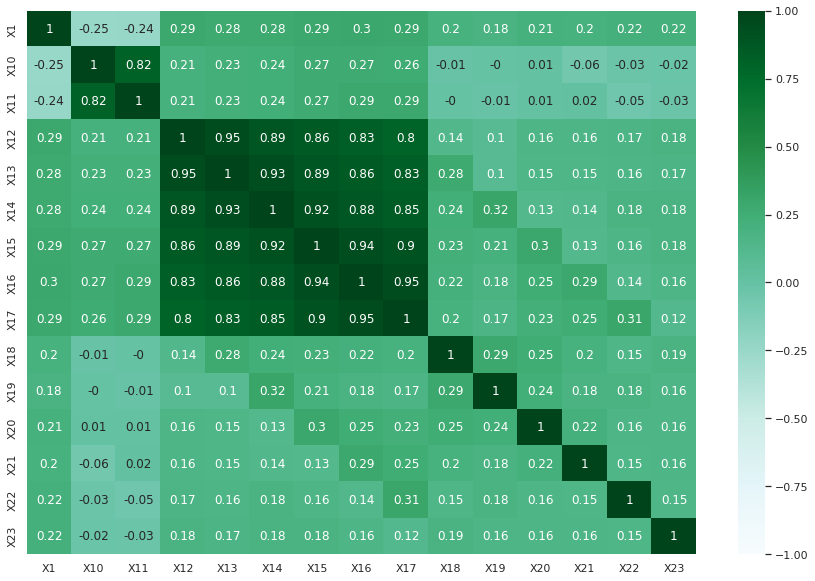

In [56]:
corr = df.corr()
sns.set(rc={"figure.figsize": (15,10)})
sns.heatmap(corr.round(2),vmin=-1,vmax=1,cmap="BuGn",
            annot=True)

Iniciamos PCA, aplicamos normalizacion.

In [57]:
pcs = PCA()
pcs.fit(preprocessing.scale(df))

PCA()

Examinamos la magnitud y la dirección de los coeficientes de las variables originales, Mientras mas largo sea el valor absoluto del coeficiente, lo mas importante que su variable corresponiente es en el calculo del componente.

In [58]:
pcsSummary_df=pd.DataFrame(
    {
      "Standard Desviation": np.sqrt(pcs.explained_variance_),
      "Proportion of Variance": pcs.explained_variance_ratio_,
      "Cumulative Proportion": np.cumsum(pcs.explained_variance_ratio_)
    }
)

pcsSummary_df=pcsSummary_df.transpose()
pcsSummary_df.columns=[
    "PC{}".format(i) for i in range(1,len(pcsSummary_df.columns)+1)
]
pcsSummary_df.round(4)

,PC1,PC2,PC3,PC4,PC5,PC6,PC7,PC8,PC9,PC10,PC11,PC12,PC13,PC14,PC15
Standard Desviation,2.4592,1.4708,1.1820,0.9515,0.9404,0.9346,0.8842,0.8523,0.7907,0.5071,0.4223,0.2657,0.2025,0.1592,0.1525
Proportion of Variance,0.4032,0.1442,0.0931,0.0604,0.0590,0.0582,0.0521,0.0484,0.0417,0.0171,0.0119,0.0047,0.0027,0.0017,0.0015
Cumulative Proportion,0.4032,0.5474,0.6405,0.7009,0.7598,0.8181,0.8702,0.9186,0.9603,0.9774,0.9893,0.9940,0.9968,0.9985,1.0000


Se comparan los componentes con las variables originales para checar cuales aportan un mayor peso

In [59]:
pcsComponents_df=pd.DataFrame(
    pcs.components_.transpose(),
    columns=pcsSummary_df.columns,
    index=df.columns
).abs()
pcsComponents_df=pcsComponents_df.iloc[:,:8]
pcsComponents_df

,PC1,PC2,PC3,PC4,PC5,PC6,PC7,PC8
X1,0.145670,0.396194,0.124271,0.100707,0.005576,0.078826,0.115503,0.069585
X10,0.122885,0.507767,0.387294,0.102351,0.074385,0.009525,0.048391,0.004904
X11,0.126741,0.498442,0.399222,0.115484,0.007885,0.060812,0.012658,0.002082
X12,0.367941,0.045244,0.217831,0.020051,0.029704,0.048920,0.003848,0.007778
X13,0.379194,0.045611,0.183373,0.058232,0.060152,0.036301,0.038909,0.136106
X14,0.384548,0.031033,0.117133,0.100591,0.113887,0.082060,0.127619,0.096359
X15,0.388878,0.041407,0.091360,0.091711,0.015918,0.020510,0.123022,0.035673
X16,0.386375,0.040873,0.069647,0.029411,0.134421,0.064436,0.007073,0.045654
X17,0.378477,0.032930,0.067225,0.106209,0.125492,0.098206,0.007664,0.009117
X18,0.128343,0.239727,0.346534,0.403678,0.157944,0.027352,0.213156,0.741288


Obtenemos una lista del valor absoluto de los maximos valores en cada componente

In [60]:
pcsComponents_df.abs().idxmax()

PC1    X15
PC2    X10
PC3    X11
PC4    X22
PC5    X21
PC6    X23
PC7    X20
PC8    X18
dtype: object

Obtenemos las variables con menos peso para cada componente

In [61]:
pcsComponents_df.abs().idxmin()

PC1    X23
PC2    X14
PC3    X17
PC4    X12
PC5     X1
PC6    X10
PC7    X12
PC8    X11
dtype: object

Realizamos una grafica de valores atipicos o boxplot para identificar los valores atipicos

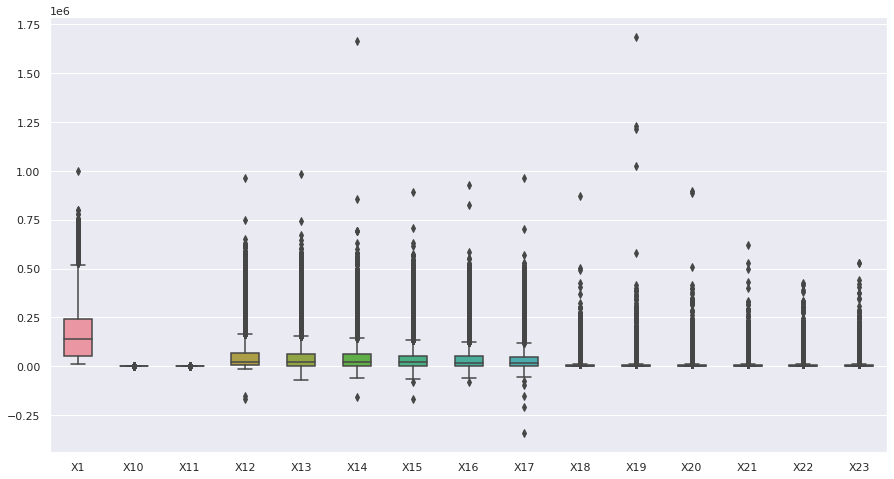

In [62]:
df_valoresAtipicos=df.copy()
plt.figure(figsize=(15,8))
sns.boxplot(data=df_valoresAtipicos,width=0.5)
plt.show()

# Preguntas

1.   ¿Cuál es el número de componentes mínimo y por qué?
*   El numero de componentes minimos es 8 porque 8 representan mas del 90% del total de variabilidad
2.   ¿Cuál es la variación de los datos que representan esos componentes?
*   Entre 0.03 y 0.07
3.   ¿Cuál es la pérdida de información después de realizar PCA?
*   8.14%
4.   De las variables originales, ¿Cuál tiene mayor y cuál tiene menor importancia en los componentes principales?
*   Mayor importancia por componente:
  PC1: X15,
  PC2: X10,
  PC3: X11,
  PC4: X22,
  PC5: X21,
  PC6: X23,
  PC7: X20,
  PC8: X18
*   Menor importancia por componente:
  PC1: X23,
  PC2: X14,
  PC3: X17,
  PC4: X12,
  PC5: X1,
  PC6: X10,
  PC7: X12,
  PC8: X11
5.   ¿Cuándo se recomienda realizar un PCA y qué beneficios ofrece para Machine Learning?
*   El analisis principal de componentes es una tecnica popular de unsupervised learning para reducir la dimensionalidad de los datos. Incrementa la interoperabilidad pero, al mismo tiempo, minimiza la perdida de informacion. Ayuda a encontrar los features mas significativos en un dataset y hace que sea facil el graficarlos en 2D y 3D. PCA ayuda a encontrar una secuencia de combinaciones lineares de variables.
PCA ofrece muchos beneficios. Por ejemplo, al reducir la dimensionalidad de los datos, PCA nos permite generalizar de una mejor manera los modelos de machine learning. Esto nos ayuda a lidiar con la "maldicion de dimensionalidad". La mayoria, si no es que todos los algoritmos de performance dependen en las dimensiones de los datos.
Los modelos que corran con datos con una muy alta dimensionalidad podrian resultar ser lentos o incluso podrian llegar a fallar y podrian requerir recursos del servidor significativos. PCA nos puede ayudar a mejorar el performance a un costo muy bajo del accuracy del modelo. 
Otros beneficios de PCA incluye reduccion de ruido en los datos, seleccion de features (hasta cierto nivel), y la habilidad de producir independiente y no relacionados features para los datos. PCA tambien nos permite visualizar los datos y nos permite hacer la inspeccion de agrupamiento/clasificacion de algoritmos.